In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
road=cv2.imread('DATA/road_image.jpg')

In [3]:
road_copy=np.copy(road)

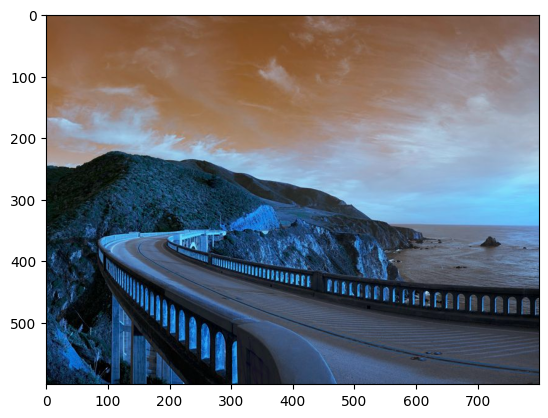

In [4]:
plt.imshow(road)

In [5]:
road.shape[:2]

(600, 800)

In [6]:
marker_image=np.zeros(road.shape[:2],dtype=np.int32)


In [7]:
segments=np.zeros(road.shape,dtype=np.uint8)

In [8]:
marker_image.shape

(600, 800)

In [9]:
from matplotlib import cm

In [10]:

cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [11]:
def create_rgb(i):
     return tuple(np.array(cm.tab10(i)[:3])*255)

In [12]:
colors=[]
for i in range(10):
    colors.append(create_rgb(i))


In [13]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [14]:
## global markers
n_marker=10
current_marker=1

marks_updates=False

In [15]:
def mouse_callback(event,x,y,flags,param):
  global marks_updates


  if event==cv2.EVENT_LBUTTONDOWN:
    #markers passed to the watershed algo
    cv2.circle(marker_image,(x,y),10,(current_marker),-1) 

    # users see on the road image
    cv2.circle(road_copy,(x,y),10,colors[current_marker],-1)

    marks_updates=True

In [16]:
#while True:

cv2.namedWindow('road Image')

cv2.setMouseCallback('Road_image',mouse_callback)

while True:

  cv2.imshow('watershed segments',segments)
  cv2.imshow('Road image',road_copy)

  #close all windows

  k=cv2.waitKey(1)

  if k==27:
    break

  #clearing all the colors i fuser press c keys
  elif k==ord('c'):
    road_copy=road.copy()
    marker_image=np.zeros(road.shape[:2],dtype=np.int32)
    segments=np.zeros(road.shape,dtype=np.uint8)

  #update color choice

  elif k>0 and chr(k).isdigit():
    current_marker=int(chr(k))

  #update the markings
  if marks_updates:
    marker_image_copy=marker_image.copy()
    cv2.watershed(road,marker_image_copy)
    segments=np.zeros(road.shape,dtype=np.uint8)

    for color_ind in range(10):
      segments[marker_image_copy==(color_ind)]=colors[color_ind]

cv2.destroyAllWindows()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2543: error: (-27:Null pointer) NULL window: 'Road_image' in function 'cvSetMouseCallback'


: 